In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot

In [3]:
billboard = pd.read_csv('billboard.csv')
billboard

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,http://www.billboard.com/charts/hot-100/1963-0...,6/1/1963,11,Still,Bill Anderson,StillBill Anderson,1.0,17.0,11.0,8.0
1,http://www.billboard.com/charts/hot-100/1967-0...,1/7/1967,11,Coming Home Soldier,Bobby Vinton,Coming Home SoldierBobby Vinton,1.0,17.0,11.0,8.0
2,http://www.billboard.com/charts/hot-100/1971-0...,7/3/1971,11,She's Not Just Another Woman,The 8th Day,She's Not Just Another WomanThe 8th Day,1.0,17.0,11.0,8.0
3,http://www.billboard.com/charts/hot-100/1975-1...,11/29/1975,11,Saturday Night,Bay City Rollers,Saturday NightBay City Rollers,1.0,17.0,11.0,8.0
4,http://www.billboard.com/charts/hot-100/1979-0...,9/29/1979,11,Pop Muzik,M,Pop MuzikM,1.0,17.0,11.0,8.0
...,...,...,...,...,...,...,...,...,...,...
325690,https://www.billboard.com/charts/hot-100/2018-...,3/17/2018,38,You Make It Easy,Jason Aldean,You Make It EasyJason Aldean,1.0,38.0,28.0,6.0
325691,https://www.billboard.com/charts/hot-100/2018-...,3/24/2018,34,You Make It Easy,Jason Aldean,You Make It EasyJason Aldean,1.0,38.0,28.0,7.0
325692,https://www.billboard.com/charts/hot-100/2018-...,3/31/2018,36,You Make It Easy,Jason Aldean,You Make It EasyJason Aldean,1.0,34.0,28.0,8.0
325693,https://www.billboard.com/charts/hot-100/2018-...,4/7/2018,34,You Make It Easy,Jason Aldean,You Make It EasyJason Aldean,1.0,36.0,28.0,9.0


## Checking if all weeks do contain 100 hits

In [4]:
counts = billboard.groupby('WeekID').count()['url']
counts[counts != 100]

WeekID
11/16/1991    99
11/23/1991    99
11/30/1991    99
12/14/1991    99
12/7/1991     99
Name: url, dtype: int64

It seems like there are 5 weeks in 1991 where there are 99 hits instead of 100. 

## Taking the top 10

In [5]:
top_ten = billboard[billboard['Week Position'] <= 10]

In [6]:
# Making sure that there are 10 songs for each week 
top_ten_counts = top_ten.groupby('WeekID').count()['Week Position']
top_ten_counts[top_ten_counts != 10]

Series([], Name: Week Position, dtype: int64)

For every week, we indeed have **10 distinct top songs**. 

In [6]:
# Counting the number of different ranks for each of the top 10:
ranks = top_ten.groupby('WeekID').nunique()['Week Position']
ranks[ranks != 10]

WeekID
8/16/1958    9
8/23/1958    9
8/9/1958     9
Name: Week Position, dtype: int64

For 3 weeks in '58, it seems like 9 ranks instead of 10, which means that there were 2 songs that shared one rank.

In [8]:
# For example:
top_ten[top_ten['WeekID'] == '8/16/1958'].sort_values(by='Week Position')

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
27151,http://www.billboard.com/charts/hot-100/1958-0...,8/16/1958,1,Nel Blu Dipinto Di Blu (Volaré),Domenico Modugno,Nel Blu Dipinto Di Blu (Volaré)Domenico Modugno,1.0,2.0,1.0,3.0
27179,http://www.billboard.com/charts/hot-100/1958-0...,8/16/1958,2,Little Star,The Elegants,Little StarThe Elegants,1.0,14.0,2.0,3.0
27186,http://www.billboard.com/charts/hot-100/1958-0...,8/16/1958,3,My True Love,Jack Scott,My True LoveJack Scott,1.0,6.0,3.0,3.0
227997,http://www.billboard.com/charts/hot-100/1958-0...,8/16/1958,4,Poor Little Fool,Ricky Nelson,Poor Little FoolRicky Nelson,1.0,1.0,1.0,3.0
27220,http://www.billboard.com/charts/hot-100/1958-0...,8/16/1958,5,Just A Dream,Jimmy Clanton And His Rockets,Just A DreamJimmy Clanton And His Rockets,1.0,9.0,5.0,3.0
228007,http://www.billboard.com/charts/hot-100/1958-0...,8/16/1958,5,Patricia,Perez Prado And His Orchestra,PatriciaPerez Prado And His Orchestra,1.0,3.0,2.0,3.0
294975,http://www.billboard.com/charts/hot-100/1958-0...,8/16/1958,7,When,Kalin Twins,WhenKalin Twins,1.0,5.0,5.0,3.0
228053,http://www.billboard.com/charts/hot-100/1958-0...,8/16/1958,8,Rebel-'rouser,Duane Eddy His Twangy Guitar And The Rebels,Rebel-'rouserDuane Eddy His Twangy Guitar And ...,1.0,8.0,6.0,3.0
27277,http://www.billboard.com/charts/hot-100/1958-0...,8/16/1958,9,Fever,Peggy Lee,FeverPeggy Lee,1.0,13.0,9.0,3.0
228089,http://www.billboard.com/charts/hot-100/1958-0...,8/16/1958,10,Splish Splash,Bobby Darin,Splish SplashBobby Darin,1.0,4.0,3.0,3.0


--> For 3 weeks in August '58, two hits had the same 'Week Position' (for example, in the week 8/16/1958, 'Just A Dream' and 'Patricia' both had rank 5). This does not impact our analysis, as we do not really give much importance to ranks.

## Adding the audio features to the data

In [267]:
audio_feats = pd.read_excel('audio_features.xlsx')
audio_feats.head()

,SongID,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_album,spotify_track_explicit,spotify_track_duration_ms,spotify_track_popularity,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,"AdictoTainy, Anuel AA & Ozuna","Tainy, Anuel AA & Ozuna",Adicto,['pop reggaeton'],3jbT1Y5MoPwEIpZndDDwVq,NaN,Adicto (with Anuel AA & Ozuna),0.0,270740.0,91.0,...,10.0,-4.803,0.0,0.0735,0.01700,0.000016,0.1790,0.623,80.002,4.0
1,The Ones That Didn't Make It Back HomeJustin M...,Justin Moore,The Ones That Didn't Make It Back Home,"['arkansas country', 'contemporary country', '...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ShallowLady Gaga & Bradley Cooper,Lady Gaga & Bradley Cooper,Shallow,"['dance pop', 'pop']",2VxeLyX666F8uXCJ0dZF8B,NaN,A Star Is Born Soundtrack,0.0,215733.0,88.0,...,7.0,-6.362,1.0,0.0308,0.37100,0.000000,0.2310,0.323,95.799,4.0
3,EnemiesPost Malone Featuring DaBaby,Post Malone Featuring DaBaby,Enemies,"['dfw rap', 'melodic rap', 'rap']",0Xek5rqai2jcOWCYWJfVCF,NaN,Hollywood's Bleeding,1.0,196760.0,86.0,...,6.0,-4.169,1.0,0.2100,0.05880,0.000000,0.0955,0.667,76.388,4.0
4,"Bacc At It AgainYella Beezy, Gucci Mane & Quavo","Yella Beezy, Gucci Mane & Quavo",Bacc At It Again,"['dfw rap', 'rap', 'southern hip hop', 'trap']",2biNa12dMbHJrHVFRt8JyO,https://p.scdn.co/mp3-preview/fa6fa6f6f363be29...,Bacc At It Again,1.0,228185.0,61.0,...,8.0,-5.725,0.0,0.1680,0.00124,0.000001,0.0716,0.856,135.979,4.0


### Genre

In [9]:
audio_genre = top_ten.merge(right=audio_feats, how='inner', on=['SongID'])[["spotify_genre","WeekID"]]
audio_genre['WeekID'] = (pd.to_datetime(audio_genre['WeekID']).dt.year//10)*10
audio_genre.spotify_genre = audio_genre.spotify_genre.apply(lambda x : str(x).strip('][').split(', '))
audio_genre = audio_genre.explode("spotify_genre").groupby("WeekID")["spotify_genre"].value_counts().to_frame('counts')

In [10]:
top_decade = audio_genre.groupby('WeekID').head(3).reset_index().astype({"WeekID": object})
top_decade

,WeekID,spotify_genre,counts
0,1950,'rock-and-roll',367
1,1950,'brill building pop',320
2,1950,'adult standards',275
3,1960,'brill building pop',2477
4,1960,'adult standards',1793
5,1960,'bubblegum pop',1564
6,1970,'soft rock',2189
7,1970,'mellow gold',2153
8,1970,'adult standards',1505
9,1980,'soft rock',2709


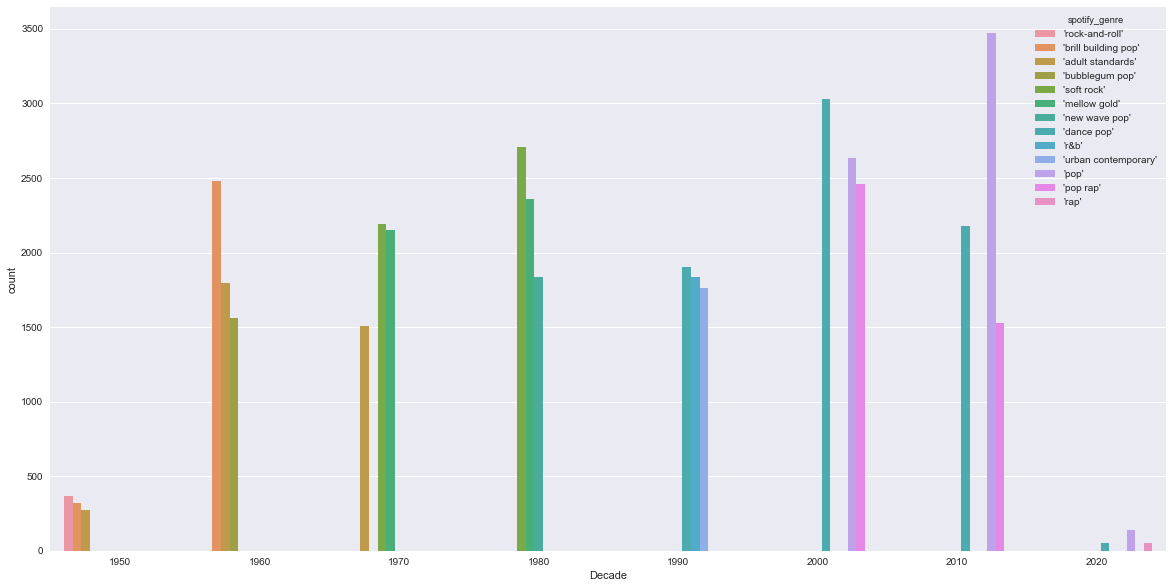

In [11]:
import seaborn as sns
pyplot.figure(figsize=(20,10))
pyplot.style.use("seaborn")
sns.barplot(x="WeekID", y="counts", hue="spotify_genre", data=top_decade)
pyplot.xlabel("Decade")
pyplot.ylabel("count")
pyplot.show()

### Merging the datasets

**There are a few songs on the billboard that are not present in the Hot 100 Audio Features dataset :**

In [ ]:
# Drop useless columns (in general, spotify related info)
light_audio = audio_feats.drop(columns=['spotify_track_id', 'spotify_track_preview_url',\
                                        'spotify_track_album', 'spotify_track_popularity'])
merged = top_ten.merge(right=light_audio, how='left', on=['SongID'], indicator=True)
missing = merged[merged['_merge'] != 'both']

merged = merged.drop(columns = ['Performer_y', 'Song_y']).rename(columns={"Song_x": "Song", "Performer_x": "Performer"})

missing.to_csv('to_scrape.csv')

There are 881 missing songs. We scraped them in a separate notebook(Spotify Scraping), using `spotipy`.

In [235]:
scraped = pd.read_csv('scraped.csv')\
.drop(columns =['Unnamed: 0', 'duration_ms', 'spotify_track_id', 'id'])\
.rename(columns={"Song_x": "Song", "Performer_x": "Performer"})

complete = merged[merged['_merge'] == 'both'].append(scraped, ignore_index=True)
complete['WeekID'] = pd.to_datetime(complete['WeekID'])
complete= complete.sort_values(by='WeekID')

In [276]:
# complete.to_pickle('complete_10.pkl')
# complete = pd.read_pickle('complete_10.pkl')

### Computing the average audio features per week & visualizing their evolution

In [ ]:
complete_avg_week = complete.groupby('WeekID').mean()

The interesting numerical features to plot are: 
* spotify_track_duration
* danceability
* energy
* key ?
* loudness
* speechiness
* acousticness
* instrumentalness
* liveness
* valence
* tempo
* time signature

In [240]:
sns.set()

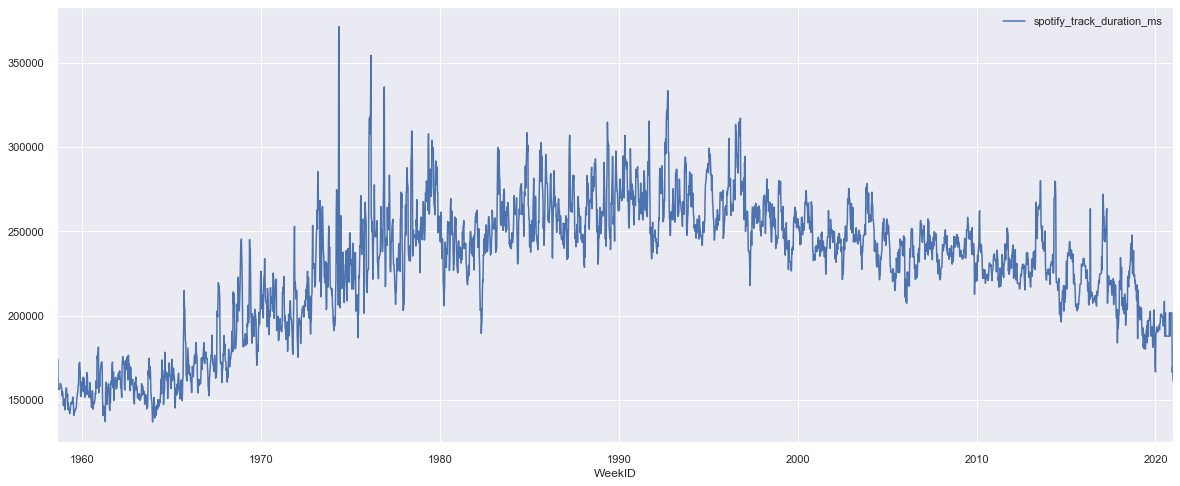

In [245]:
complete_avg_week.plot(y='spotify_track_duration_ms', figsize=(20, 8), use_index=True);

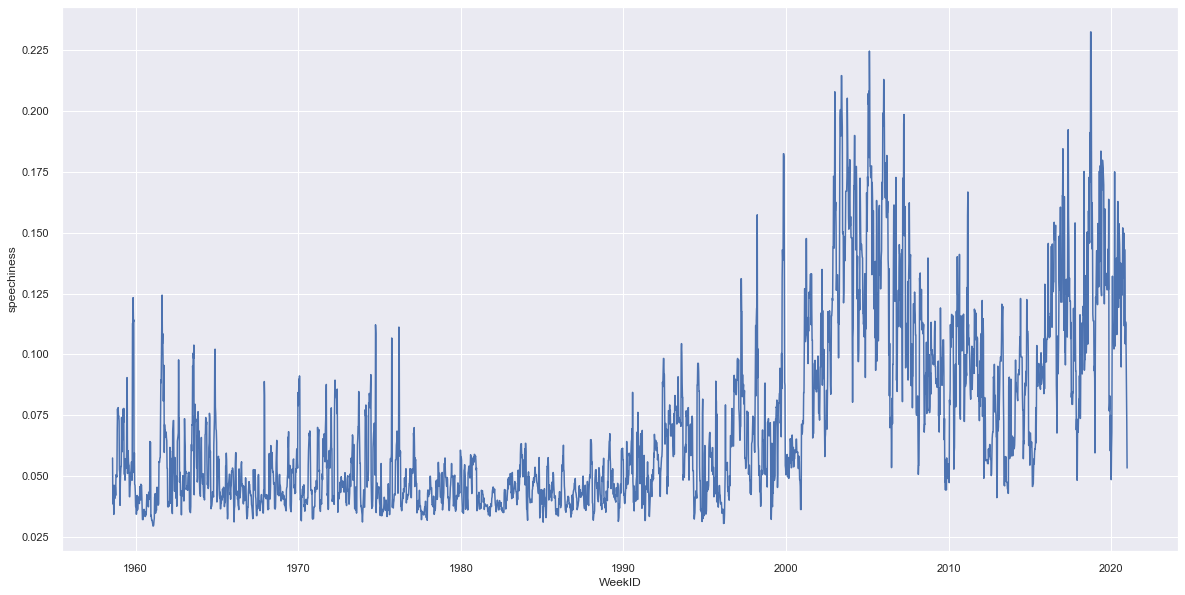

In [246]:
fig, ax = pyplot.subplots(figsize=(20,10))
sns.lineplot(ax=ax, data=complete_avg_week, x=complete_avg_week.index, y="speechiness", ci=None)

### Trying to plot one point per month

In [243]:
# The following added column contains only the month and the year info for each row
complete['month_year'] = pd.to_datetime(complete['WeekID']).dt.to_period('M')

complete_avg_month = complete.groupby('month_year').mean()

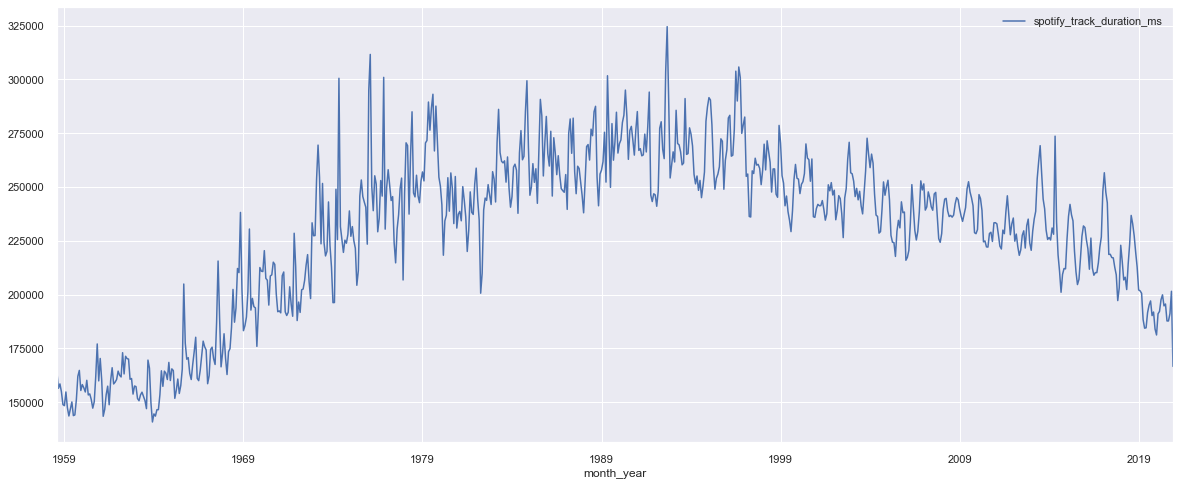

In [248]:
complete_avg_month.plot(y=['spotify_track_duration_ms'], figsize=(20, 8), use_index=True);

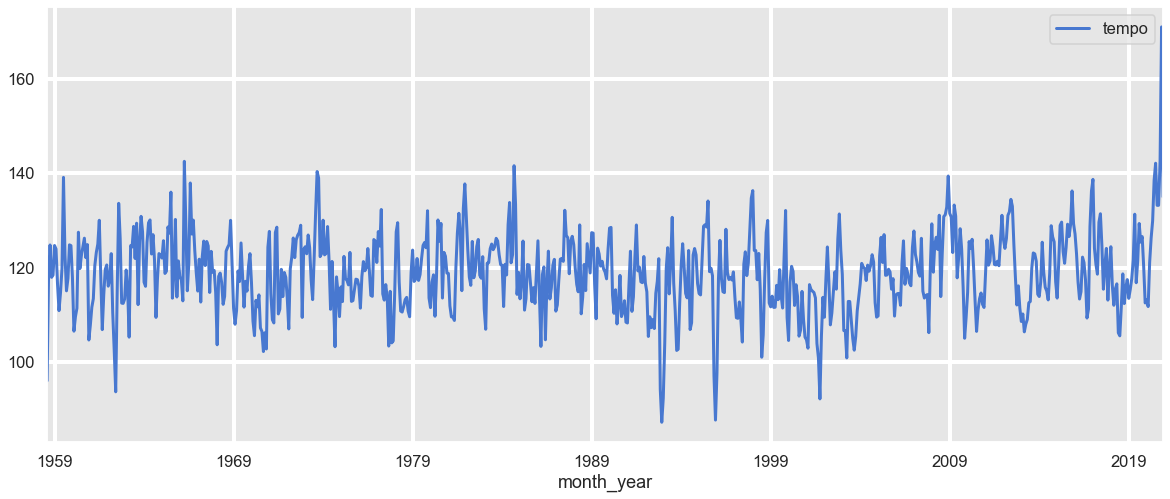

In [37]:
complete_avg_month.plot(y=['tempo'], figsize=(20, 8), use_index=True);

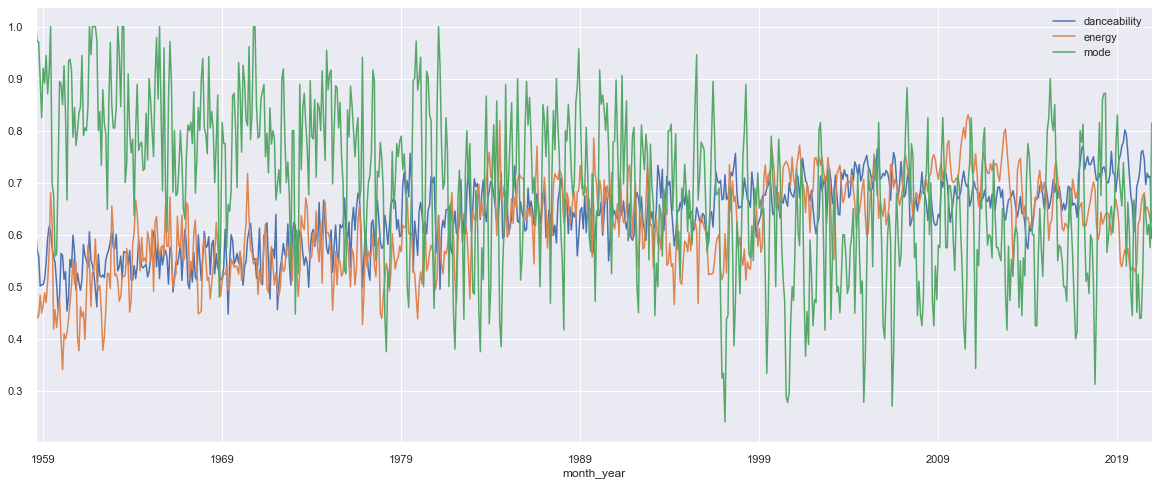

In [250]:
complete_avg_month.plot(y=['danceability', 'energy', 'mode'], figsize=(20, 8), use_index=True);

### Trying to plot one point per year

In [251]:
# The following added column contains only the year info for each row
complete['year'] = pd.to_datetime(complete['WeekID']).dt.to_period('Y')

complete_avg_year = complete.groupby('year').mean()

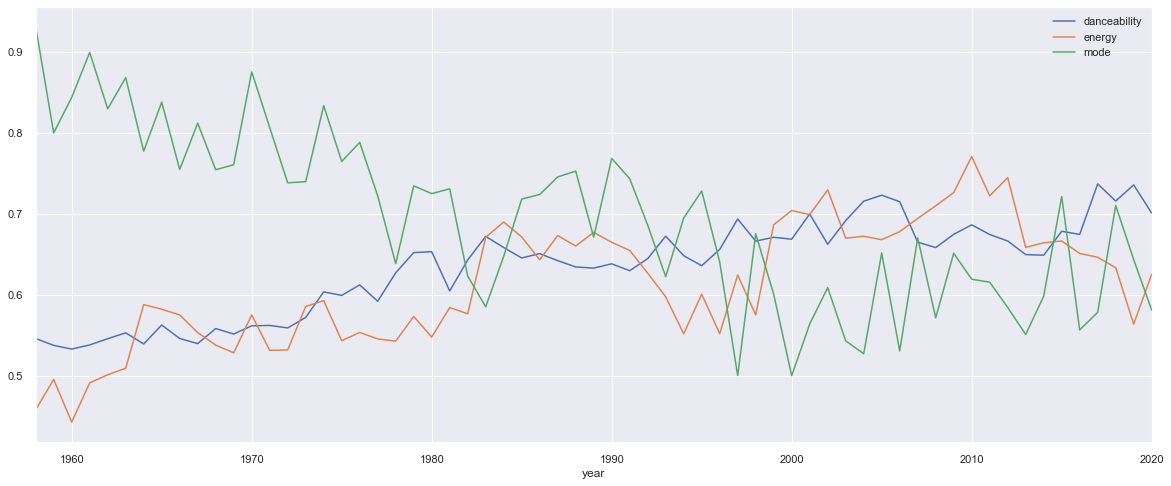

In [253]:
complete_avg_year.plot(y=['danceability', 'energy', 'mode'], figsize=(20, 8), use_index=True);

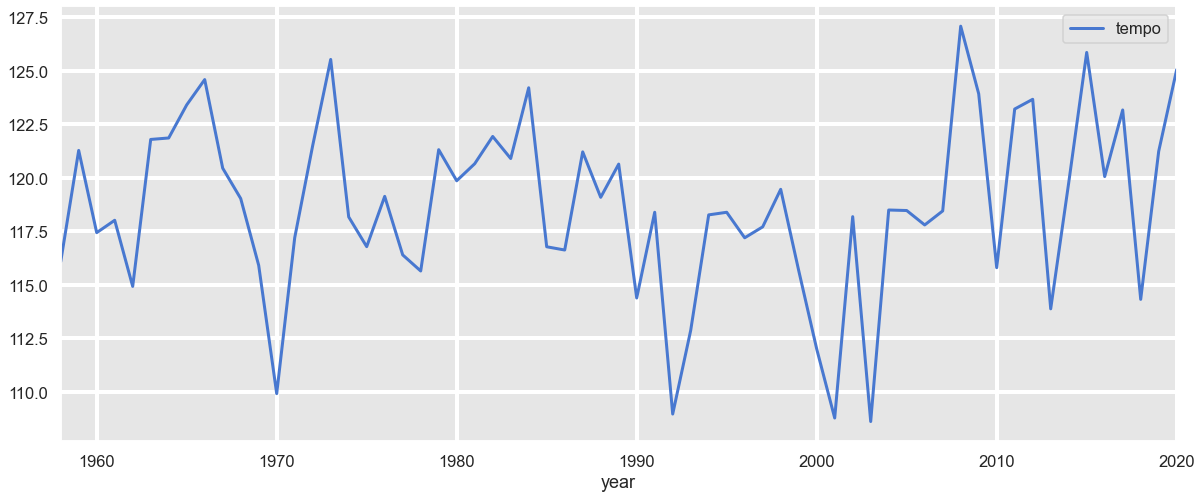

In [38]:
complete_avg_year.plot(y=['tempo'], figsize=(20, 8), use_index=True);

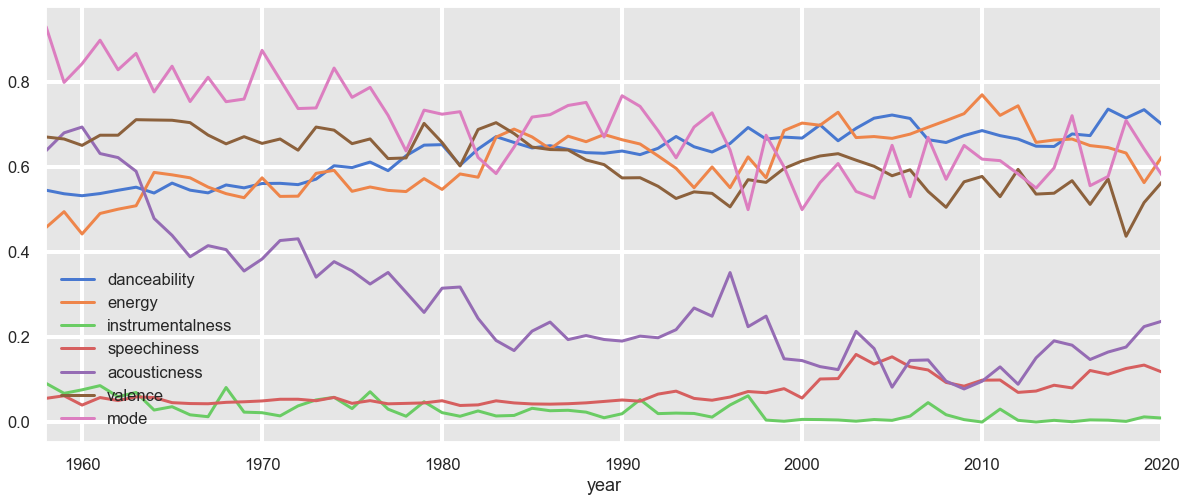

In [254]:
# sns.set_style("ticks")
sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 3, "grid.linewidth": 4})
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_palette("muted")
complete_avg_year.plot(y=['danceability', 'energy', 'instrumentalness', 'speechiness', 'acousticness','valence','mode'],\
                     figsize=(20, 8), use_index=True);

### Same but with all 100 songs per week 

In [262]:
# Drop useless columns (in general, spotify related info)
merged_100 = billboard.merge(right=light_audio, how='left', on=['SongID'], indicator=True)

missing_100 = merged_100[merged_100['_merge']!='both' ]

missing_100.to_csv('to_scrape_100.csv')

In [ ]:
scraped_100 = pd.read_csv('scraped_100.csv')\
.drop(columns =['Unnamed: 0', 'duration_ms', 'spotify_track_id', 'id'])\
.rename(columns={"Song_x": "Song", "Performer_x": "Performer"})

complete_100 = merged_100[merged_100['_merge'] == 'both'].append(scraped_100, ignore_index=True)
complete_100['WeekID'] = pd.to_datetime(complete_100['WeekID'])

complete_100['WeekID'] = pd.to_datetime(complete_100['WeekID'])

In [271]:
# The following added column contains only the year info for each row
complete_100['year'] = pd.to_datetime(complete_100['WeekID']).dt.to_period('Y')
complete_100['month_year'] = pd.to_datetime(complete_100['WeekID']).dt.to_period('M')

# complete_100.to_pickle('complete_100.pkl')
# complete_100 = pd.read_pickle('complete_100.pkl')

complete_100_avg_year = complete_100.groupby('year').mean()
complete_100_avg_month = complete_100.groupby('month_year').mean()

In [275]:
complete_100.to_pickle('complete_100.pkl')

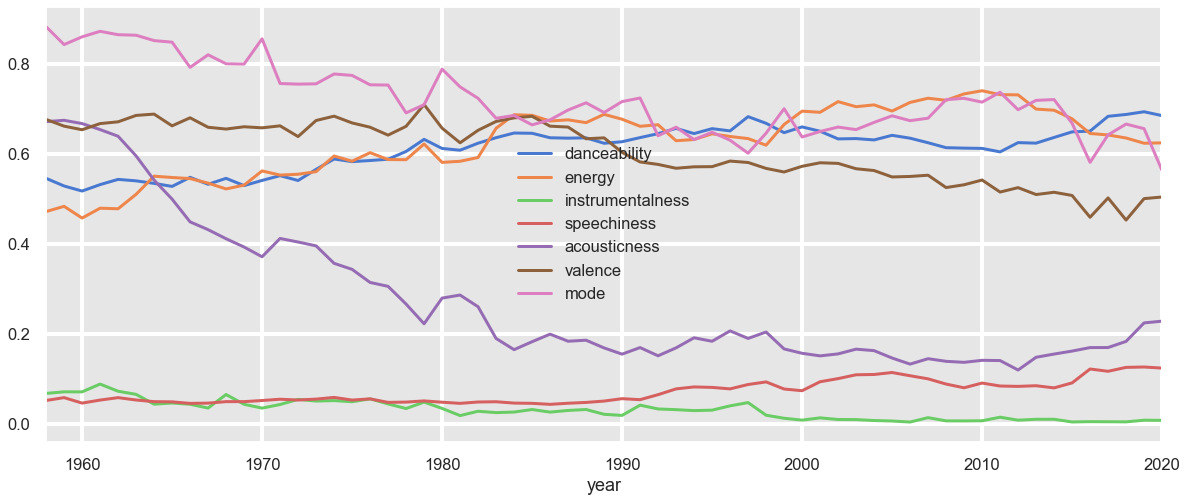

In [273]:
# sns.set_style("ticks")
sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 3, "grid.linewidth": 4})
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_palette("muted")
complete_100_avg_year.plot(y=['danceability', 'energy', 'instrumentalness', 'speechiness', 'acousticness','valence','mode'],\
                     figsize=(20, 8), use_index=True);

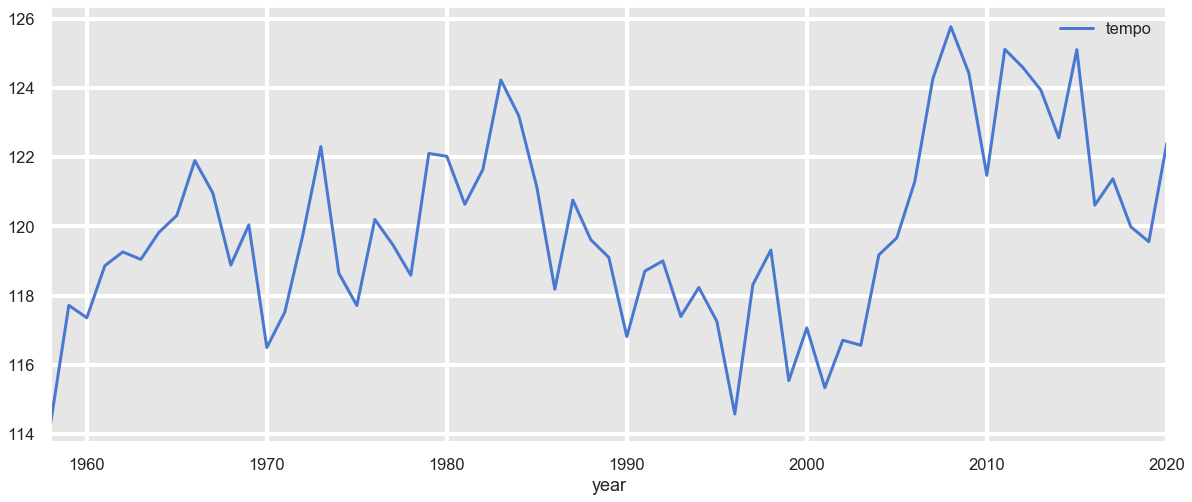

In [274]:
complete_100_avg_year.plot(y=['tempo'], figsize=(20, 8), use_index=True);

**--> Smoother !**